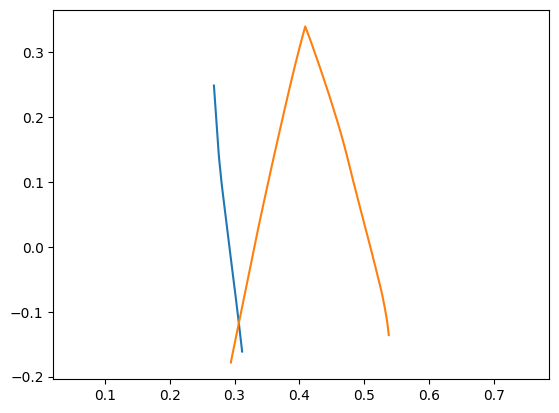

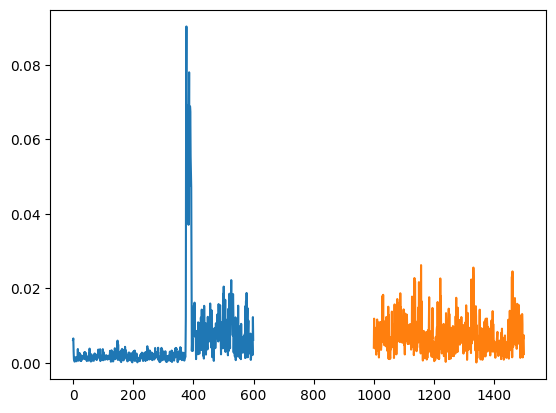

0.006210171123696437 m/s^2
0.007456206714533767 m/s^2
3.567892354670572e-05 Joules
4.203093549809543e-05 Joules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hz = 500 #Kamerans uppdateringsfrekvens
massa_a = 0.0287262
radie_a = 0.0025
massa_b = 0.0281852
radie_b = 0.0025


dir = "DATA//raw//del2//friktion//"

dfa = pd.read_csv(dir+"center_a.csv")
dfb = pd.read_csv(dir+"center_b.csv")

df = pd.concat([dfa,dfb], axis=1)

a_acc = np.linalg.norm(np.column_stack((np.gradient(np.gradient(df["c_a_x"])), np.gradient(np.gradient(df["c_a_y"])))), axis=1)*hz
b_acc = np.linalg.norm(np.column_stack((np.gradient(np.gradient(df["c_b_x"])), np.gradient(np.gradient(df["c_b_y"])))), axis=1)*hz

plt.plot(df["c_a_x"][400:800], df["c_a_y"][400:800])
plt.plot(df["c_b_x"], df["c_b_y"])


plt.axis("equal")
plt.show()

plt.plot(df.index[:600], b_acc[:600])
plt.plot(df.index[1000:1500], b_acc[1000:1500])
plt.show()

a_mean = np.nanmean(a_acc[1000:1500])
b_mean = np.nanmean(b_acc[1000:1500])

print(a_mean, "m/s^2")
print(b_mean, "m/s^2")

def nrg(acc, massa):
    return 0.5*massa*(acc*0.4) #0.4 totala energiintervallet

a_nrg = nrg(a_mean, massa_a)
print(a_nrg,"Joules")
b_nrg = nrg(b_mean, massa_b)
print(b_nrg,"Joules")